In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from imblearn.over_sampling import SMOTE
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [26]:
def model(W,x,b):
    #print(W.shape)
    u = np.dot(W,x) + b
    #print(u.shape)
    return 1 if (1/(1+np.exp(-1*u)) >= 0.5) else 0

In [27]:
def predict(W,X,b):
    Y_pred = []
    for x in X:
        u = np.dot(W,x) + b
        Y_pred.append(1 if 1/(1+np.exp(-1*u)) >= 0.5 else 0)
    return Y_pred    

In [28]:
def fit(ephocs,X,Y,W,b):
    for i in range(ephocs):
        for x,y in zip(X,Y):
            y_pred = model(W,x,b)
            #print(y_pred)
            if y == 1 and y_pred == 0:
                W = W + x
                b = b + 1
            elif y == 0 and y_pred == 1:
                W = W - x
                b = b - 1    
    return W,b            

In [29]:
X_train = pd.read_csv('Train_file.csv')
Y_train = np.array(X_train.iloc[:,60])
X_train = np.array(X_train.iloc[:,np.arange(60)])

In [30]:
X_test = pd.read_csv('Test_file.csv')
Y_test = np.array(X_test.iloc[:,60])
X_test = np.array(X_test.iloc[:,np.arange(60)])

In [31]:
W = np.ones(X_train.shape[1])
b = np.random.randint(0,100,size = 1)
W,b = fit(3,X_train,Y_train,W,b)
Y_pred = predict(W,X_test,b)

C:\Users\gurus\AppData\Local\Temp\ipykernel_12620\45583361.py:5: RuntimeWarning: overflow encountered in exp
  return 1 if (1/(1+np.exp(-1*u)) >= 0.5) else 0


F1-Score = (2\*precision\*recall)/(precision+recall)

In [32]:
# class-1 will considered as positive
TP = 0
FP = 0
FN = 0
TN = 0
for y,y_pred in zip(Y_test,Y_pred):
    if y == 1 and y_pred == 1:
        TP+=1
    elif y == 0 and y_pred == 1:
        FP+=1
    elif y == 1 and y_pred == 0:  
        FN+=1
    else:
        TN+=1

class1_prec = TP/(TP+FP)
class0_prec = TN/(TN+FN)

class1_recall = TP/(TP+FN)
class0_recall = TN/(TN+FP)

class1_F1 = (2*class1_prec*class1_recall)/(class1_prec+class1_recall)
class0_F1 = (2*class0_prec*class0_recall)/(class0_prec+class0_recall)

print("Class 1 F1-Score :",class1_F1)
print("Class 0 F1-Score :",class0_F1)

accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Overall Accuracy = ",accuracy)

Class 1 F1-Score : 0.8599279078032187
Class 0 F1-Score : 0.8817554536493378
Overall Accuracy =  0.8717638856611666


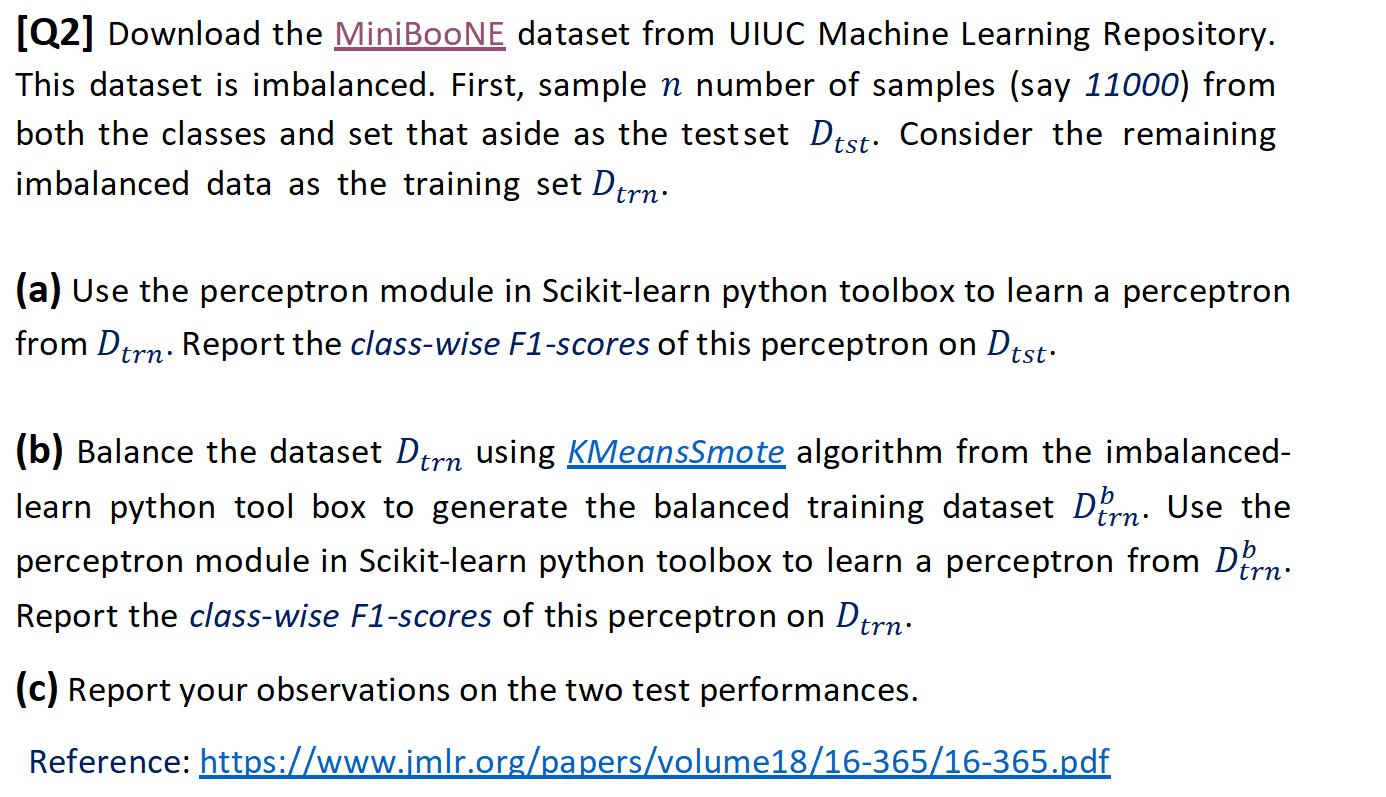

In [49]:
# 36499 93565
data = np.loadtxt("MiniBooNE_PID.txt")

In [50]:
class_0_count = 93565
class_1_count = 36499
labels = np.concatenate((np.zeros(class_0_count),np.ones(class_1_count))).astype(int)
len(labels)

130064

In [51]:
X_test = np.row_stack((data[:11000],data[93565:93565+11000]))
Y_test = np.concatenate((labels[:11000],labels[93565:93565+11000]))

X_train = np.row_stack((data[11000:93565],data[93565+11000:]))
Y_train = np.concatenate((labels[11000:93565],labels[93565+11000:]))

In [52]:
clf = Perceptron()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

In [53]:
clf.score(X_test,Y_test)

0.5001363636363636

In [54]:
# class-1 will considered as positive
TP = 0
FP = 0
FN = 0
TN = 0
for y,y_pred in zip(Y_test,Y_pred):
    if y == 1 and y_pred == 1:
        TP+=1
    elif y == 0 and y_pred == 1:
        FP+=1
    elif y == 1 and y_pred == 0:  
        FN+=1
    else:
        TN+=1

class1_prec = TP/(TP+FP)
class0_prec = TN/(TN+FN)

class1_recall = TP/(TP+FN)
class0_recall = TN/(TN+FP)

class1_F1 = (2*class1_prec*class1_recall)/(class1_prec+class1_recall)
class0_F1 = (2*class0_prec*class0_recall)/(class0_prec+class0_recall)

print("Class 1 F1-Score :",class1_F1)
print("Class 0 F1-Score :",class0_F1)

accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Overall Accuracy = ",accuracy)

Class 1 F1-Score : 0.6667272782374156
Class 0 F1-Score : 0.0005453058256839044
Overall Accuracy =  0.5001363636363636


In [65]:
sm = SMOTE(k_neighbors=7)
X_res,Y_res = sm.fit_resample(X_train,Y_train)

In [66]:
clf = Perceptron()
clf.fit(X_res,Y_res)
Y_pred = clf.predict(X_test)

In [67]:
clf.score(X_test,Y_test)

0.8899

Observation :
* After Oversampling Performance of classifer is improved.

In [68]:
# class-1 will considered as positive
TP = 0
FP = 0
FN = 0
TN = 0
for y,y_pred in zip(Y_test,Y_pred):
    if y == 1 and y_pred == 1:
        TP+=1
    elif y == 0 and y_pred == 1:
        FP+=1
    elif y == 1 and y_pred == 0:  
        FN+=1
    else:
        TN+=1

class1_prec = TP/(TP+FP)
class0_prec = TN/(TN+FN)

class1_recall = TP/(TP+FN)
class0_recall = TN/(TN+FP)

class1_F1 = (2*class1_prec*class1_recall)/(class1_prec+class1_recall)
class0_F1 = (2*class0_prec*class0_recall)/(class0_prec+class0_recall)

print("Class 1 F1-Score :",class1_F1)
print("Class 0 F1-Score :",class0_F1)

accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Overall Accuracy = ",accuracy)

Class 1 F1-Score : 1.0
Class 0 F1-Score : 1.0
Overall Accuracy =  1.0


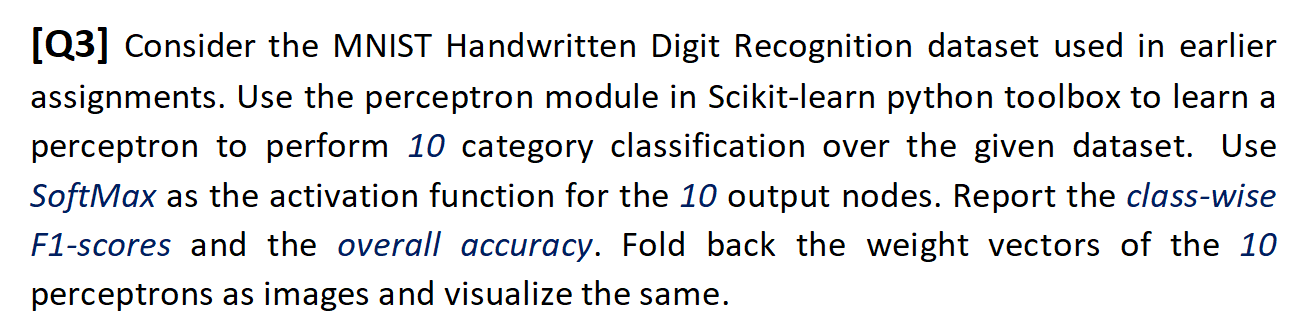

In [69]:
from sklearn.metrics import f1_score

In [70]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [71]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
#X_test = X_test/255
#X_train = X_train/255

In [72]:
clf = Perceptron()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,Y_test)
print("Accuracy : ",accuracy)

Accuracy :  0.8897


In [73]:
F1_Score = f1_score(y_true=Y_test,y_pred=Y_pred,average=None)
F1_Score

array([0.94695092, 0.96700396, 0.88910226, 0.8562212 , 0.89989785,
       0.82299887, 0.93454936, 0.91601562, 0.79358289, 0.8502316 ])

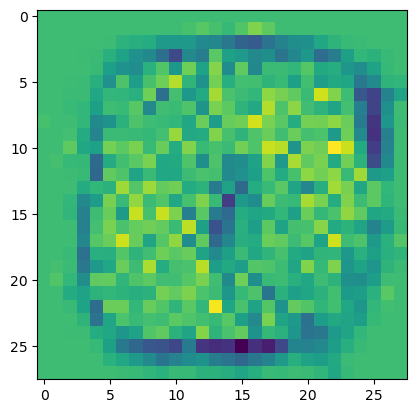

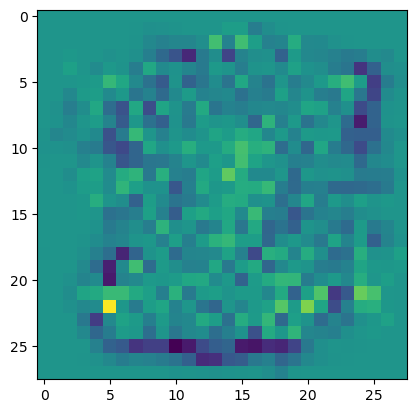

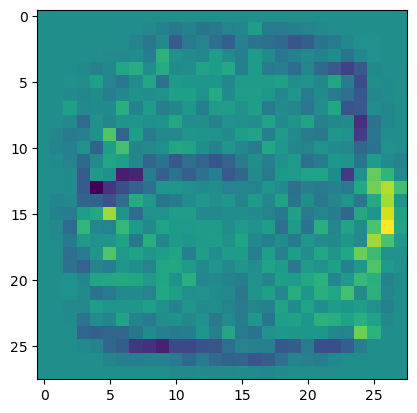

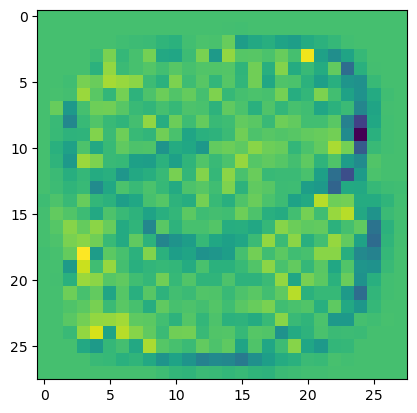

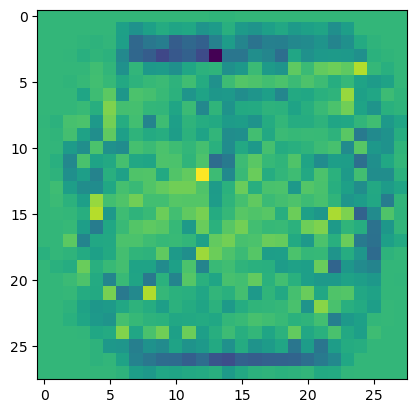

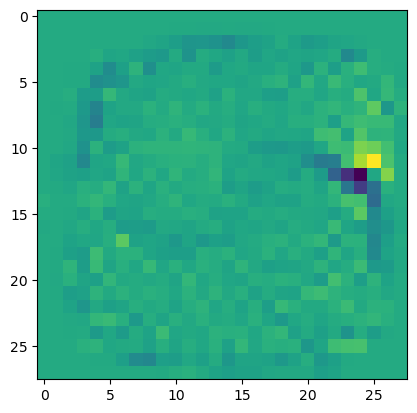

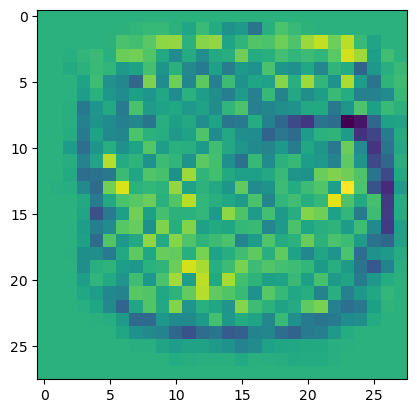

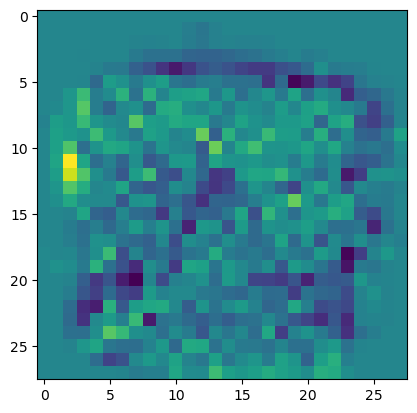

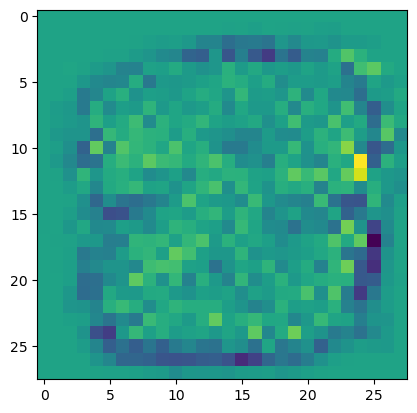

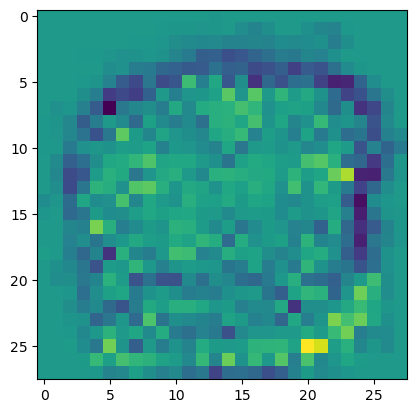

In [74]:
weights = clf.coef_

for image_weight in weights:
    plt.imshow(image_weight.reshape(28,28))
    plt.show()